# DATASET PREPARATION

Our intention is to classify the users' behaviours in 2 different classes: STATIC and MOVEMENT.

In the analysis conducted before, we selected just a subset of labels with respect to the numerous labels that we can found in the ExtraSensory dataset. The selected labels were splitted in 2 different macro-groups: STATIC and MOVEMENT. 

So first of all let's load the dataset, then let's remove unnecessary labels

# Nuova sezione

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import gzip

datasetZipFolder = "drive/MyDrive/IoT DA/Behavioral-Context-Recognition-main/datasetExtrasensory"

df_list=[]
for gzFile in os.listdir(datasetZipFolder):
  gzPath = datasetZipFolder+"//"+gzFile
  with gzip.open(gzPath) as f:
      df = pd.read_csv(f, header=0)
      df.insert(0,'uuid',gzFile[:-23])
      df_list.append(df)

df_dset = pd.concat(df_list, axis=0, ignore_index=True)
df_dset

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,...,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,0.002558,0.001510,0.001832,0.002531,0.001526,0.002196,0.003230,2.236059,6.532865,5.149616,2.818909,3.757026,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,0.002279,0.001256,0.001519,0.002183,0.001424,0.002035,0.002880,2.028993,6.550010,4.945471,2.153223,2.719359,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375,0.002579,0.001790,0.002418,0.003395,0.001350,0.002088,0.003187,1.975138,6.492197,4.878255,3.366933,3.824890,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
3,00EABED2-271D-49D8-B599-1D4A09240601,1444079341,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,5.043263,0.000019,0.000173,0.000623,0.003763,0.429628,0.173474,0.479430,0.004179,0.005551,-0.996836,0.004202,0.002919,0.003559,0.308841,0.773514,0.296194,0.00249

In [ ]:
def get_label_pretty_name(label):
    if label == 'FIX_walking':
        return 'Walking';
    if label == 'FIX_running':
        return 'Running';
    if label == 'LOC_main_workplace':
        return 'At main workplace';
    if label == 'OR_indoors':
        return 'Indoors';
    if label == 'OR_outside':
        return 'Outside';
    if label == 'LOC_home':
        return 'At home';
    if label == 'FIX_restaurant':
        return 'At a restaurant';
    if label == 'OR_exercise':
        return 'Exercise';
    if label == 'LOC_beach':
        return 'At the beach';
    if label == 'OR_standing':
        return 'Standing';
    if label == 'WATCHING_TV':
        return 'Watching TV'
    
    if label.endswith('_'):
        label = label[:-1] + ')';
        pass;
    
    label = label.replace('__',' (').replace('_',' ');
    label = label[0] + label[1:].lower();
    label = label.replace('i m','I\'m');
    return label;

In [ ]:
movement_labels = ['Walking', 'Cooking', 'Cleaning', 'Shopping', 'Running', 'Bicycling', 'Drive - I\'m the driver', 'Strolling', 
                   'Doing laundry', 'At the gym', 'Stairs - going up', 'Stairs - going down']
static_labels = ['Sitting', 'Lying down', 'Sleeping', 'In a meeting', 'In class', 'Computer work', 'Watching TV', 'Drive - I\'m a passenger']

In [ ]:
user_data = []

# for label in static_labels:
#   user_data += df_dset.loc[df_dset["label:"+label]==1]

for col in df_dset.columns:
  if(col.startswith("label:") ):
    temp_label = col.replace("label:", "")
    # print(temp_label)
    temp_label = get_label_pretty_name(temp_label)       
    # print(temp_label)
    if(temp_label in static_labels or temp_label in movement_labels):
      # print(temp_label)
      # print(col, temp_label)
      df_dset = df_dset.rename(columns = {col: temp_label})
    else:
      # print(temp_label)
      df_dset = df_dset.drop(columns=[col])



In [ ]:
df_dset

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,...,discrete:wifi_status:is_reachable_via_wifi,discrete:wifi_status:is_reachable_via_wwan,discrete:wifi_status:missing,lf_measurements:light,lf_measurements:pressure,lf_measurements:proximity_cm,lf_measurements:proximity,lf_measurements:relative_humidity,lf_measurements:battery_level,lf_measurements:screen_brightness,lf_measurements:temperature_ambient,discrete:time_of_day:between0and6,discrete:time_of_day:between3and9,discrete:time_of_day:between6and12,discrete:time_of_day:between9and15,discrete:time_of_day:between12and18,discrete:time_of_day:between15and21,discrete:time_of_day:between18and24,discrete:time_of_day:between21and3,Lying down,Sitting,Walking,Running,Bicycling,Sleeping,In class,In a meeting,Drive - I'm the driver,Drive - I'm a passenger,Cooking,Shopping,Strolling,Cleaning,Doing laundry,Watching TV,Computer work,At the gym,Stairs - going up,Stairs - going down,label_source
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,0.002558,0.001510,0.001832,0.002531,0.001526,0.002196,0.003230,2.236059,6.532865,5.149616,2.818909,3.757026,...,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.46,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,0.002279,0.001256,0.001519,0.002183,0.001424,0.002035,0.002880,2.028993,6.550010,4.945471,2.153223,2.719359,...,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.46,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375,0.002579,0.001790,0.002418,0.003395,0.001350,0.002088,0.003187,1.975138,6.492197,4.878255,3.366933,3.824890,...,1.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.46,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
3,00EABED2-271D-49D8-B599-1D4A09240601,1444079341,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,

Now, let's define a method that allow to select just a subset of features that we want to include in the final dataset that we will use for the classifcation.


In [ ]:
for col in df_dset.columns:
  print(col)

uuid
timestamp
raw_acc:magnitude_stats:mean
raw_acc:magnitude_stats:std
raw_acc:magnitude_stats:moment3
raw_acc:magnitude_stats:moment4
raw_acc:magnitude_stats:percentile25
raw_acc:magnitude_stats:percentile50
raw_acc:magnitude_stats:percentile75
raw_acc:magnitude_stats:value_entropy
raw_acc:magnitude_stats:time_entropy
raw_acc:magnitude_spectrum:log_energy_band0
raw_acc:magnitude_spectrum:log_energy_band1
raw_acc:magnitude_spectrum:log_energy_band2
raw_acc:magnitude_spectrum:log_energy_band3
raw_acc:magnitude_spectrum:log_energy_band4
raw_acc:magnitude_spectrum:spectral_entropy
raw_acc:magnitude_autocorrelation:period
raw_acc:magnitude_autocorrelation:normalized_ac
raw_acc:3d:mean_x
raw_acc:3d:mean_y
raw_acc:3d:mean_z
raw_acc:3d:std_x
raw_acc:3d:std_y
raw_acc:3d:std_z
raw_acc:3d:ro_xy
raw_acc:3d:ro_xz
raw_acc:3d:ro_yz
proc_gyro:magnitude_stats:mean
proc_gyro:magnitude_stats:std
proc_gyro:magnitude_stats:moment3
proc_gyro:magnitude_stats:moment4
proc_gyro:magnitude_stats:percentile25
p

In [ ]:
features_to_consider = ['raw_acc', 'watch_acceleration', 'location', 'audio_naive', 'lf_measurements']

final_feature_names = []
columns_to_delete = []
to_delete = True

for col in df_dset.columns:
  if(col == 'Lying down'):
    #it's the first label column: starting from here, all columns must not be discarded
    break;
  to_delete = True
  for feature in features_to_consider:
    # print("CHECK",col, feature)
    if (col.startswith(feature) or col == 'uuid' or col == 'timestamp'):
      # print("MATCH", col)
      to_delete = False
      final_feature_names.append(col)
      break;

  if(to_delete):
    # print("DELETE", col)
    columns_to_delete.append(col)


In [ ]:
final_dataset = df_dset.drop(columns= columns_to_delete)
final_dataset

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,...,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:light,lf_measurements:pressure,lf_measurements:proximity_cm,lf_measurements:proximity,lf_measurements:relative_humidity,lf_measurements:battery_level,lf_measurements:screen_brightness,lf_measurements:temperature_ambient,Lying down,Sitting,Walking,Running,Bicycling,Sleeping,In class,In a meeting,Drive - I'm the driver,Drive - I'm a passenger,Cooking,Shopping,Strolling,Cleaning,Doing laundry,Watching TV,Computer work,At the gym,Stairs - going up,Stairs - going down,label_source
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,...,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,NaN,NaN,NaN,0.0,NaN,0.46,0.381436,NaN,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,...,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,NaN,NaN,NaN,0.0,NaN,0.46,0.381436,NaN,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375,1031.643125,17.119299,10.606363,24.535996,1025.124383,1033.518263,1041.506601,2.322894,6.214471,5.046789,0.007309,0.020632,...,1.251340,0.803958,0.546688,0.562475,0.559488,0.445827,0.472388,0.462703,0.359176,0.430171,0.330055,NaN,NaN,NaN,0.0,NaN,0.46,0.381436,NaN,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,Na

This is the final dataset that we are going to consider for our classification: now we have to clean it because there are some missing values

In [ ]:
print("Number of NaN values in the dataset: ",final_dataset.isna().sum().sum())
noNaN_each_row = (final_dataset.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  13955657
Number of no-NaN values in the dataset:  41136859


Since there are many missing values, we can start cleaning the dataset removing all those columns where the number of no-NaN values is less than 10% of the rows.

In [ ]:
n_values_each_column = final_dataset.count(axis = 0)
n_values_each_column

uuid                               377346
timestamp                          377346
raw_acc:magnitude_stats:mean       377056
raw_acc:magnitude_stats:std        377056
raw_acc:magnitude_stats:moment3    377056
                                    ...  
Computer work                      237559
At the gym                          44393
Stairs - going up                   94629
Stairs - going down                 94415
label_source                       377346
Length: 146, dtype: int64

Let's find the columns' index that we have to delete

In [ ]:
index_toDel = []

for column_index,n_values in enumerate(n_values_each_column):
  if((float(n_values)/final_dataset.shape[0]*100)<10):
    print(float(n_values)/final_dataset.shape[0]*100)
    index_toDel.append(column_index)

6.874062531469792
7.009482013854658


In [ ]:
feature_to_del = []
print(index_toDel)
for i in index_toDel:
  feature_to_del.append(final_dataset.columns[i])

final_dataset = final_dataset.drop(feature_to_del, axis = 1)
final_dataset

[121, 124]


,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,...,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:light,lf_measurements:pressure,lf_measurements:proximity_cm,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Sitting,Walking,Running,Bicycling,Sleeping,In class,In a meeting,Drive - I'm the driver,Drive - I'm a passenger,Cooking,Shopping,Strolling,Cleaning,Doing laundry,Watching TV,Computer work,At the gym,Stairs - going up,Stairs - going down,label_source
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,...,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,NaN,NaN,NaN,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,...,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,NaN,NaN,NaN,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375,1031.643125,17.119299,10.606363,24.535996,1025.124383,1033.518263,1041.506601,2.322894,6.214471,5.046789,0.007309,0.020632,...,2.537650,1.186965,1.251340,0.803958,0.546688,0.562475,0.559488,0.445827,0.472388,0.462703,0.359176,0.430171,0.330055,NaN,NaN,NaN,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,Na

Let's see how many nan values are still in the dataset

In [ ]:
print("Number of NaN values in the dataset: ",final_dataset.isna().sum().sum())
noNaN_each_row = (final_dataset.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  13253354
Number of no-NaN values in the dataset:  41084470


Since there are still many nan values, let's remove columns with more than 50% of values that are nan

In [ ]:
n_values_each_column = final_dataset.count(axis = 0)
n_values_each_column

uuid                               377346
timestamp                          377346
raw_acc:magnitude_stats:mean       377056
raw_acc:magnitude_stats:std        377056
raw_acc:magnitude_stats:moment3    377056
                                    ...  
Computer work                      237559
At the gym                          44393
Stairs - going up                   94629
Stairs - going down                 94415
label_source                       377346
Length: 144, dtype: int64

In [ ]:
index_toDel = []

for column_index,n_values in enumerate(n_values_each_column):
  if((float(n_values)/final_dataset.shape[0]*100)<50):
    # print(final_dataset.columns[column_index], float(n_values)/final_dataset.shape[0]*100)
    if(not(final_dataset.columns[column_index] in static_labels or final_dataset.columns[column_index] in movement_labels)): #because we don't want to delete also label columns
      index_toDel.append(column_index)



In [ ]:
feature_to_del = []
print(index_toDel)
for i in index_toDel:
  feature_to_del.append(final_dataset.columns[i])

final_dataset = final_dataset.drop(feature_to_del, axis = 1)
final_dataset

[79, 80, 117, 118, 119]


,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,...,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Sitting,Walking,Running,Bicycling,Sleeping,In class,In a meeting,Drive - I'm the driver,Drive - I'm a passenger,Cooking,Shopping,Strolling,Cleaning,Doing laundry,Watching TV,Computer work,At the gym,Stairs - going up,Stairs - going down,label_source
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,...,-0.907876,-0.681724,-0.683515,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,...,-0.865482,-0.703950,-0.718397,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375,1031.643125,17.119299,10.606363,24.535996,1025.124383,1033.518263,1041.506601,2.322894,6.214471,5.046789,0.007309,0.020632,...,-0.710762,-0.694606,-0.720886,2.537650,1.186965,1.251340,0.803958,0.546688,0.562475,0.559488,0.445827,0.472388,0.462703,0.359176,0.430171,0.330055,0.

In [ ]:
print("Number of NaN values in the dataset: ",final_dataset.isna().sum().sum())
noNaN_each_row = (final_dataset.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  11978529
Number of no-NaN values in the dataset:  40472565


There are still many nan values. But we can notice that many nan values are in the column labels (Lying down, Sitting ,....): for example there are rows with Sitting = 1.0, and all the other labels nan. 

We simply have to substitute all these label columns with a single column 'CLASS' that is 1 for static labels(those rows where Sitting, Lying down or other static labels =1), 0 for movement ones(those rows were Cookin, shopping, cleaning or other movement labels = 1).

In [ ]:
final_dataset

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,...,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Sitting,Walking,Running,Bicycling,Sleeping,In class,In a meeting,Drive - I'm the driver,Drive - I'm a passenger,Cooking,Shopping,Strolling,Cleaning,Doing laundry,Watching TV,Computer work,At the gym,Stairs - going up,Stairs - going down,label_source
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,...,-0.907876,-0.681724,-0.683515,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,...,-0.865482,-0.703950,-0.718397,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375,1031.643125,17.119299,10.606363,24.535996,1025.124383,1033.518263,1041.506601,2.322894,6.214471,5.046789,0.007309,0.020632,...,-0.710762,-0.694606,-0.720886,2.537650,1.186965,1.251340,0.803958,0.546688,0.562475,0.559488,0.445827,0.472388,0.462703,0.359176,0.430171,0.330055,0.

Let's set CLASS= 1 for static, CLASS=0 for movement 

In [ ]:
final_dataset['CLASS'] = 0 #default

for index, row in final_dataset.iterrows():
  for label in static_labels:
    if(row[label]==1.0):
      final_dataset.at[index, 'CLASS'] = 1


final_dataset


,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,...,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Sitting,Walking,Running,Bicycling,Sleeping,In class,In a meeting,Drive - I'm the driver,Drive - I'm a passenger,Cooking,Shopping,Strolling,Cleaning,Doing laundry,Watching TV,Computer work,At the gym,Stairs - going up,Stairs - going down,label_source,CLASS
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,...,-0.681724,-0.683515,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2,1
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,...,-0.703950,-0.718397,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2,1
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375,1031.643125,17.119299,10.606363,24.535996,1025.124383,1033.518263,1041.506601,2.322894,6.214471,5.046789,0.007309,0.020632,...,-0.694606,-0.720886,2.537650,1.186965,1.251340,0.803958,0.546688,0.562475,0.559488,0.445827,0.472388,0.462703,0.359176,0.430171,0.330055,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,

In [ ]:
# for index, row in final_dataset.iterrows():
#   for label in static_labels+movement_labels:
#     if(row[label]=='NaN'):
#       print("OH")

In [ ]:
# label_indexs = []

# for label in static_labels+movement_labels:
#   label_indexs.append(final_dataset.columns.get_loc(label))



In [ ]:
# final_dataset[final_dataset.columns[118:]]

Now let's see if there are rows with all nan values in labels' columns: this means that if there are rows with Sitting = nan, Lying down = nan, Cooking = nan ... and all the other labels = nan, we have to delete these rows.


In [ ]:
import math

row_with_allNan = True
rowIndex_toDel = []

for index, row in final_dataset.iterrows():
  row_with_allNan = True
  # print("Riga ",index)
  for i in range (118, len(row)-2):
    # print(final_dataset.columns[i], row[i])
    if(math.isnan(row[i])):
      ;
    else:
      row_with_allNan = False
      # print("No-nan value: cambia riga")
      break
  if(row_with_allNan):
    rowIndex_toDel.append(index)
    
  

In [ ]:
final_dataset_copy = final_dataset.copy()

final_dataset_copy.drop(labels = rowIndex_toDel, axis = 0, inplace=True)

final_dataset_copy

,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,...,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,Lying down,Sitting,Walking,Running,Bicycling,Sleeping,In class,In a meeting,Drive - I'm the driver,Drive - I'm a passenger,Cooking,Shopping,Strolling,Cleaning,Doing laundry,Watching TV,Computer work,At the gym,Stairs - going up,Stairs - going down,label_source,CLASS
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,...,-0.681724,-0.683515,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2,1
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,...,-0.703950,-0.718397,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,2,1
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375,1031.643125,17.119299,10.606363,24.535996,1025.124383,1033.518263,1041.506601,2.322894,6.214471,5.046789,0.007309,0.020632,...,-0.694606,-0.720886,2.537650,1.186965,1.251340,0.803958,0.546688,0.562475,0.559488,0.445827,0.472388,0.462703,0.359176,0.430171,0.330055,0.0,0.46,0.381436,0.0,1.0,0.0,NaN,NaN,0.0,0.0,

After deleting those rows, now we can remove all the labels' columns since we successfully added the CLASS column that has been constructed as explained before.

In [ ]:
print(final_dataset_copy.columns[118:-1])

final_dataset_copy.drop(labels = final_dataset_copy.columns[118:-1], axis = 1, inplace= True)

final_dataset_copy


Index(['Lying down', 'Sitting', 'Walking', 'Running', 'Bicycling', 'Sleeping',
       'In class', 'In a meeting', 'Drive - I'm the driver',
       'Drive - I'm a passenger', 'Cooking', 'Shopping', 'Strolling',
       'Cleaning', 'Doing laundry', 'Watching TV', 'Computer work',
       'At the gym', 'Stairs - going up', 'Stairs - going down',
       'label_source'],
      dtype='object')


,uuid,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,...,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,CLASS
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,...,65.0,10.0,10.102999,2.312832,0.000029,0.000032,-0.000067,-0.000073,0.000111,0.000120,-4.219657,-0.012806,-1.298291,0.094373,-1.220977,-0.851300,-1.656516,-0.898563,-0.503573,-0.518072,-0.907876,-0.681724,-0.683515,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,0.0,0.46,0.381436,1
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,...,65.0,10.0,9.611984,2.263011,0.000030,0.000025,-0.000021,0.000013,0.000044,0.000033,-7.505606,1.294372,-0.745550,-0.052791,-1.220453,-0.822848,-1.559542,-0.835154,-0.665443,-0.580521,-0.865482,-0.703950,-0.718397,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,0.0,0.46,0.381436,1
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,0

Now let's count all the nan and nonan values in the overall dataset

In [ ]:
print("Number of NaN values in the dataset: ",final_dataset_copy.isna().sum().sum())
noNaN_each_row = (final_dataset_copy.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  5851131
Number of no-NaN values in the dataset:  30838949


Let's build a dataset without uuid and timestamp columns, without substituting the NaN values:

In [ ]:
# del final_dataset_copy['uuid']
del final_dataset_copy['timestamp']
final_dataset_copy

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,...,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,CLASS
0,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,0.022606,0.083165,...,65.0,10.0,10.102999,2.312832,0.000029,0.000032,-0.000067,-0.000073,0.000111,0.000120,-4.219657,-0.012806,-1.298291,0.094373,-1.220977,-0.851300,-1.656516,-0.898563,-0.503573,-0.518072,-0.907876,-0.681724,-0.683515,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,0.0,0.46,0.381436,1
1,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,0.022919,0.128473,...,65.0,10.0,9.611984,2.263011,0.000030,0.000025,-0.000021,0.000013,0.000044,0.000033,-7.505606,1.294372,-0.745550,-0.052791,-1.220453,-0.822848,-1.559542,-0.835154,-0.665443,-0.580521,-0.865482,-0.703950,-0.718397,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,0.0,0.46,0.381436,1
2,0.996825,0.003

Let's store this dataset, that contains numerous values, in a csv file: we'll give it as input for our classifier and to MOA later

In [ ]:
# Store the dataset in CSV files
%cd "/content/drive/MyDrive/IoT DA"
final_dataset_copy.to_csv('df_uncleaned.csv', index=False)
print("CSV Created")

/content/drive/MyDrive/IoT DA
CSV Created


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')

copy_of_final = final_dataset_copy.copy()

imp = imp.fit(copy_of_final)
copy_of_final = imp.transform(copy_of_final)

copy_of_final

array([[1.44407916e+09, 9.96815000e-01, 3.52900000e-03, ...,
        4.60000000e-01, 3.81436000e-01, 1.00000000e+00],
       [1.44407922e+09, 9.96864000e-01, 4.17200000e-03, ...,
        4.60000000e-01, 3.81436000e-01, 1.00000000e+00],
       [1.44407928e+09, 9.96825000e-01, 3.66700000e-03, ...,
        4.60000000e-01, 3.81436000e-01, 1.00000000e+00],
       ...,
       [1.44423369e+09, 1.34185900e+00, 7.73106000e-01, ...,
        9.20000000e-01, 1.50000000e-05, 0.00000000e+00],
       [1.44423375e+09, 1.16408200e+00, 3.33725000e-01, ...,
        9.20000000e-01, 4.56982000e-01, 0.00000000e+00],
       [1.44423381e+09, 1.13605800e+00, 3.32312000e-01, ...,
        9.20000000e-01, 9.87446000e-01, 0.00000000e+00]])

In [ ]:
 df_imputed = pd.DataFrame(copy_of_final)

 #print(len(df_imputed.columns)) 

 df_imputed.columns = final_dataset_copy.columns


 df_imputed

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,...,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,CLASS
0,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,0.022606,0.083165,...,65.0,10.0,10.102999,2.312832,0.000029,0.000032,-0.000067,-0.000073,0.000111,0.000120,-4.219657,-0.012806,-1.298291,0.094373,-1.220977,-0.851300,-1.656516,-0.898563,-0.503573,-0.518072,-0.907876,-0.681724,-0.683515,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,0.0,0.46,0.381436,1.0
1,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,0.022919,0.128473,...,65.0,10.0,9.611984,2.263011,0.000030,0.000025,-0.000021,0.000013,0.000044,0.000033,-7.505606,1.294372,-0.745550,-0.052791,-1.220453,-0.822848,-1.559542,-0.835154,-0.665443,-0.580521,-0.865482,-0.703950,-0.718397,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,0.0,0.46,0.381436,1.0
2,0.996825,0

In [ ]:
print("Number of NaN values in the dataset: ",df_imputed.isna().sum().sum())
noNaN_each_row = (df_imputed.count())
total_noNaN = 0
for value in noNaN_each_row:
  total_noNaN+=value

print("Number of no-NaN values in the dataset: ",total_noNaN)

Number of NaN values in the dataset:  0
Number of no-NaN values in the dataset:  36073440


In [ ]:
# Store the dataset in CSV files
%cd "/content/drive/MyDrive/IoT DA"
df_imputed.to_csv('df_imputed.csv', index=False)
print("CSV Created")

/content/drive/MyDrive/IoT DA
CSV Created


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%cd "/content/drive/MyDrive/IoT DA"

dataset = pd.read_csv('df_imputed.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
validation_size = 0.3
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = validation_size, random_state = seed) # random_state = 7 because maybe better splitting data

print(X_train.shape)
print(Y_test.shape)


/content/drive/MyDrive/IoT DA
(215824, 116)
(92496,)


# Is the dataset umbalanced?

In [ ]:
samples_eachclass = df_imputed['CLASS'].value_counts()
samples_eachclass

1.0    244456
0.0     63864
Name: CLASS, dtype: int64

In [ ]:
print(samples_eachclass[0], samples_eachclass[1])
samples_eachclass[0]/(samples_eachclass[0]+samples_eachclass[1])*100

63864 244456


20.713544369486247

The second class, labeled with 0, is the 20% out of the total: we can oversample the minority class using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

print('Original dataset shape %s' % Counter(y))


Original dataset shape Counter({1.0: 244456, 0.0: 63864})


244456
63864


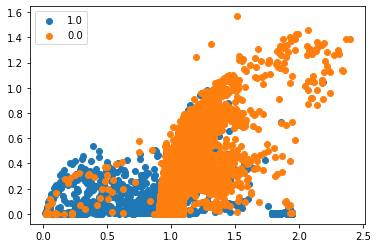

In [ ]:
from numpy import where

counter = Counter(y)


for label, _ in counter.items():
  print(_)
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
  pyplot.legend()


In [ ]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({1.0: 244456, 0.0: 244456})


244456
244456


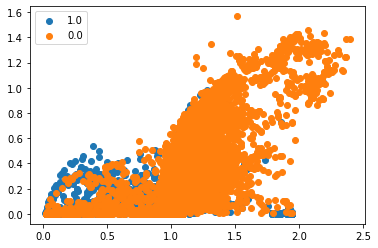

In [ ]:
counter_res = Counter(y_res)


for label, _ in counter_res.items():
  print(_)
  row_ix_res = where(y_res == label)[0]
  pyplot.scatter(X_res[row_ix_res, 0], X_res[row_ix_res, 1], label=str(label))
  pyplot.legend()

In [ ]:
print(X_res)
print("\n")
print(y_res)
print("\n")

balanced_values = (np.insert(X_res, X_res.shape[1], y_res, axis = 1))

balanced_dataset = pd.DataFrame(data=balanced_values, columns=df_imputed.columns)
balanced_dataset

[[ 9.96815000e-01  3.52900000e-03 -2.78600000e-03 ...  0.00000000e+00
   4.60000000e-01  3.81436000e-01]
 [ 9.96864000e-01  4.17200000e-03 -3.11000000e-03 ...  0.00000000e+00
   4.60000000e-01  3.81436000e-01]
 [ 9.96825000e-01  3.66700000e-03  3.09400000e-03 ...  0.00000000e+00
   4.60000000e-01  3.81436000e-01]
 ...
 [ 9.26978532e-01  2.17202953e-03  8.00827098e-04 ...  0.00000000e+00
   6.00000000e-02  3.12412037e-01]
 [ 1.09540227e+00  3.02157862e-01  2.03916663e-01 ...  0.00000000e+00
   6.19362665e-01  8.17788439e-01]
 [ 1.00210724e+00  2.73443625e-02  4.77570604e-02 ...  0.00000000e+00
   4.53309371e-01  3.86829019e-01]]


[1. 1. 1. ... 0. 0. 0.]




,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,...,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,location_quick_features:std_lat,location_quick_features:std_long,location_quick_features:lat_change,location_quick_features:long_change,location_quick_features:mean_abs_lat_deriv,location_quick_features:mean_abs_long_deriv,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,audio_naive:mfcc0:std,audio_naive:mfcc1:std,audio_naive:mfcc2:std,audio_naive:mfcc3:std,audio_naive:mfcc4:std,audio_naive:mfcc5:std,audio_naive:mfcc6:std,audio_naive:mfcc7:std,audio_naive:mfcc8:std,audio_naive:mfcc9:std,audio_naive:mfcc10:std,audio_naive:mfcc11:std,audio_naive:mfcc12:std,lf_measurements:proximity,lf_measurements:battery_level,lf_measurements:screen_brightness,CLASS
0,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494,1032.508157,17.195149,12.121621,25.390972,1024.812178,1033.146650,1041.537325,2.220749,6.214470,5.045673,0.004896,0.023827,0.022606,0.083165,...,65.000000,10.000000,10.102999,2.312832,0.000029,0.000032,-0.000067,-0.000073,0.000111,0.000120,-4.219657,-0.012806,-1.298291,0.094373,-1.220977,-0.851300,-1.656516,-0.898563,-0.503573,-0.518072,-0.907876,-0.681724,-0.683515,2.276349,1.271966,1.177478,0.670053,0.389200,0.535904,0.468701,0.358315,0.401412,0.408432,0.277176,0.416881,0.263832,0.0,0.460000,0.381436,1.0
1,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252,1031.283026,18.901671,5.132795,27.607064,1018.115906,1033.115676,1041.537325,2.355872,6.214440,5.042166,0.003692,0.025719,0.022919,0.128473,...,65.000000,10.000000,9.611984,2.263011,0.000030,0.000025,-0.000021,0.000013,0.000044,0.000033,-7.505606,1.294372,-0.745550,-0.052791,-1.220453,-0.822848,-1.559542,-0.835154,-0.665443,-0.580521,-0.865482,-0.703950,-0.718397,2.231302,1.232031,1.098946,0.669467,0.499003,0.584068,0.525900,0.435339,0.459064,0.391962,0.341445,0.362252,0.298252,0.0,0.4600

In [ ]:
# Store the dataset in CSV files
%cd "/content/drive/MyDrive/IoT DA"
balanced_dataset.to_csv('df_balanced.csv', index=False)
print("CSV Created")

/content/drive/MyDrive/IoT DA
CSV Created


So, let's split again the dataset:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size = validation_size, random_state = seed) # random_state = 7 because maybe better splitting data
print(X_train.shape)
print(Y_test.shape)

(342238, 116)
(146674,)


# Identification and comparison of the classification model
Loading of the dataset and than we split the original dataset into two parts (train and test) to evaluate the performance of a machine learning algorithm.

Standardization and Normalization of Dataset Befor training

In [ ]:
normalized = preprocessing.normalize(X_train)
normalized

array([[ 4.25164039e-04,  1.56399355e-06,  7.13256909e-07, ...,
         0.00000000e+00,  9.05038978e-05,  1.34640510e-04],
       [ 4.70473923e-04,  3.84409686e-05,  4.78771784e-05, ...,
         0.00000000e+00,  1.84061310e-04,  1.47443510e-04],
       [ 4.74480165e-04,  2.27377376e-06, -3.81750171e-06, ...,
         0.00000000e+00,  4.72521563e-04,  7.08782345e-09],
       ...,
       [ 4.73118538e-04,  5.79657512e-07, -2.83220283e-07, ...,
         0.00000000e+00,  4.48432114e-04,  1.68402780e-04],
       [ 4.37540883e-04,  2.72383817e-06, -2.33207386e-06, ...,
         0.00000000e+00,  2.54001030e-04,  0.00000000e+00],
       [ 4.68491761e-04,  2.13168100e-06,  1.18688902e-06, ...,
         0.00000000e+00,  4.48327862e-04,  1.47434759e-04]])

In [ ]:
# #Preprocessing on data
# #We then preprocessing the data to standardize it, so that all have the same scale useful 
# #for the optimization algorithms so that the classifiers can best interpret the values.

# from sklearn import preprocessing

# min_max_scaler = preprocessing.StandardScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train)
# X_test_scaled = min_max_scaler.transform(X_test)
# pd.DataFrame(X_train_scaled)

#Behaviour and testing of Classifiers


## LOGISTIC REGRESSION

In [ ]:
results = []
names = []


datas = {
    'name': 'LC',
    'model': LogisticRegression(),
    'params': {
       'penalty': ['l2'],
       'C':  [1.0, 3.0, 6.0, 7.0, 10.0],
       'solver': ['sag', 'saga']
    }}

predictionsLC, results, names = training_and_test(datas, results, names)


### using LC ###
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1.0, penalty=l2, solver=sag ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.698, total=  13.2s
[CV] C=1.0, penalty=l2, solver=sag ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s


[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.694, total=  12.6s
[CV] C=1.0, penalty=l2, solver=sag ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.8s remaining:    0.0s


[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.698, total=  11.1s
[CV] C=1.0, penalty=l2, solver=sag ...................................
[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.696, total=  11.5s
[CV] C=1.0, penalty=l2, solver=sag ...................................
[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.700, total=  12.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.698, total=   9.7s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.694, total=  10.3s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.698, total=   9.1s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.696, total=   9.7s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.8min finished


Best: 0.723277 using {'C': 10.0, 'penalty': 'l2', 'solver': 'sag'}
accuracy:  0.7244228697656027
              precision    recall  f1-score   support

         0.0       0.76      0.65      0.70     73085
         1.0       0.70      0.80      0.74     73589

    accuracy                           0.72    146674
   macro avg       0.73      0.72      0.72    146674
weighted avg       0.73      0.72      0.72    146674



## GAUSSIAN NAIVE BAYES

In [ ]:
import numpy as np

datas = {
    'name': 'GaussianNB',
    'model': GaussianNB(),
    'params': {
             'var_smoothing' : np.logspace(0,-9, num=100) 
    }}
    

In [ ]:

predictionsNB, results, names = training_and_test(datas, results, names)



### using GaussianNB ###
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... var_smoothing=1.0, score=0.644, total=   0.7s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.644, total=   0.7s
[CV] var_smoothing=1.0 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ................... var_smoothing=1.0, score=0.647, total=   0.7s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.647, total=   0.7s
[CV] var_smoothing=1.0 ...............................................
[CV] ................... var_smoothing=1.0, score=0.649, total=   0.7s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.646, total=   0.7s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.645, total=   0.7s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.648, total=   0.7s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .... var_smoothing=0.8111308307896871, score=0.647, total=   0.7s
[CV] var_smoothing=0.8111308307896871 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.7min finished


Best: 0.697944 using {'var_smoothing': 2.310129700083158e-07}
accuracy:  0.6978741971992309
              precision    recall  f1-score   support

         0.0       0.82      0.51      0.63     73085
         1.0       0.64      0.89      0.75     73589

    accuracy                           0.70    146674
   macro avg       0.73      0.70      0.69    146674
weighted avg       0.73      0.70      0.69    146674



## KNN

In [ ]:
datas = {
    'name': 'KNN',
    'model': KNeighborsClassifier(),
    'params': {
    'n_neighbors': [7, 9, 11, 13, 15]
    }}

In [ ]:
predictionsKNN, results, names = training_and_test(datas, results, names)


### using KNN ###
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_neighbors=7 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=7, score=0.849, total= 2.3min
[CV] n_neighbors=7 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] ....................... n_neighbors=7, score=0.849, total= 2.3min
[CV] n_neighbors=7 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.6min remaining:    0.0s


[CV] ....................... n_neighbors=7, score=0.846, total= 2.3min
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.847, total= 2.3min
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.851, total= 2.3min
[CV] n_neighbors=9 ...................................................
[CV] ....................... n_neighbors=9, score=0.842, total= 2.4min
[CV] n_neighbors=9 ...................................................
[CV] ....................... n_neighbors=9, score=0.842, total= 2.4min
[CV] n_neighbors=9 ...................................................
[CV] ....................... n_neighbors=9, score=0.840, total= 2.5min
[CV] n_neighbors=9 ...................................................
[CV] ....................... n_neighbors=9, score=0.841, total= 2.4min
[CV] n_neighbors=9 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 64.0min finished


Best: 0.848553 using {'n_neighbors': 7}
accuracy:  0.8566889837326316
              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87     73085
         1.0       0.93      0.78      0.84     73589

    accuracy                           0.86    146674
   macro avg       0.87      0.86      0.86    146674
weighted avg       0.87      0.86      0.86    146674



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


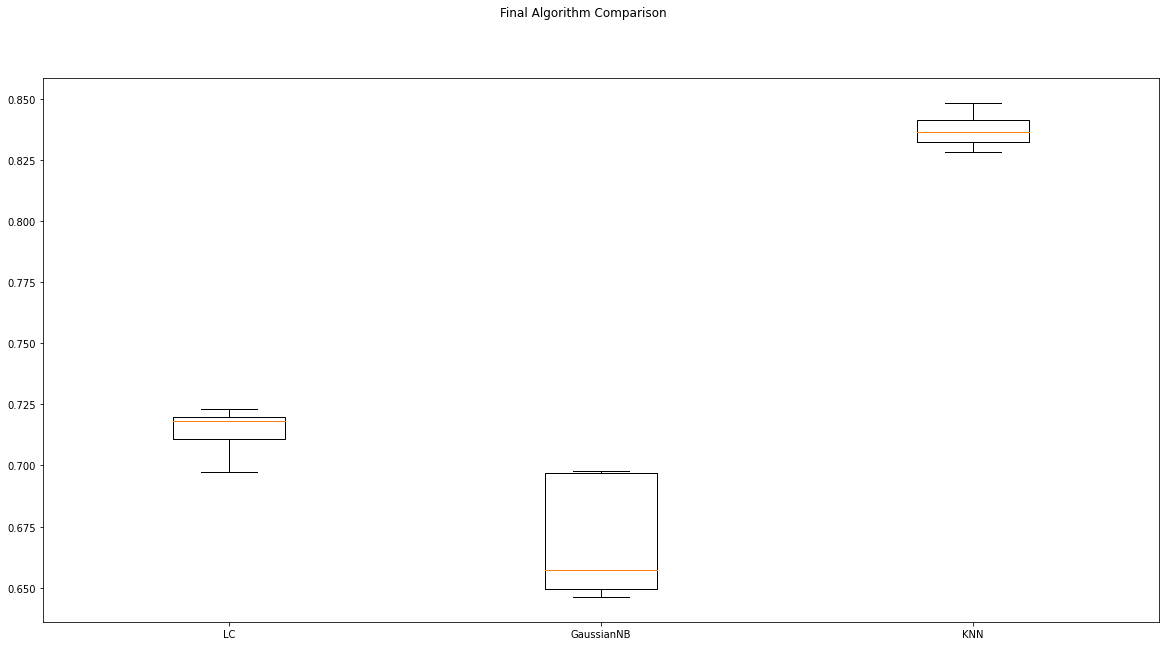

In [ ]:
import matplotlib.pyplot as pyplot

# Plot the results
fig = pyplot.figure(figsize=(20,10))
fig.suptitle('Final Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# CONFUSION MATRIX

['TN=68456', 'FP=4629', 'FN=16391', 'TP=57198']


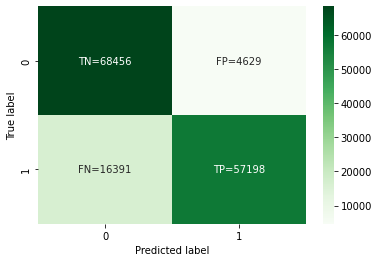

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cf_matrix = confusion_matrix(Y_test, predictionsKNN)
tn, fp, fn, tp = cf_matrix.ravel()
labels = ['TN=%d'%tn,"FP=%d"%fp,"FN=%d"%fn,"TP=%d"%tp]
print(labels)
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
plt.ylabel('True label')
plt.xlabel('Predicted label')
axis_labels = ['0', '1']
plt.xticks([0.5,1.5], axis_labels)
plt.yticks([0.5,1.5], axis_labels)
plt.show()

In [1]:
cf_matrix = confusion_matrix(Y_test, predictionsLC)
tn, fp, fn, tp = cf_matrix.ravel()
labels = ['TN=%d'%tn,"FP=%d"%fp,"FN=%d"%fn,"TP=%d"%tp]
print(labels)
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Red')
plt.ylabel('True label')
plt.xlabel('Predicted label')
axis_labels = ['0', '1']
plt.xticks([0.5,1.5], axis_labels)
plt.yticks([0.5,1.5], axis_labels)
plt.show()

NameError: ignored